In [161]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

import random

In [110]:
s = 'colorless'
s_new = s[0:4]+'u'+s[4:]
s_new

'colourless'

In [111]:
'airplanes'[:-1]

'airplane'

#### ???

In [112]:
string = 'abcdefghijklmnopqrstuvwxyz'
string[0:10:2]

'acegi'

Reverse

In [113]:
string[25:10:-2]

'zxvtrpnl'

In [114]:
string[::-1]

'zyxwvutsrqponmlkjihgfedcba'

In [115]:
sentence = 'This is a good day!'
sentence[::-1]

'!yad doog a si sihT'

In [116]:
import urllib2

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urllib2.urlopen(url).read().decode('utf8')

In [117]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()

In [118]:
tokens = word_tokenize(raw)
tokens

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'to",
 u'die',
 u'out',
 u'in',
 u'200',
 u"years'",
 u'NEWS',
 u'SPORT',
 u'WEATHER',
 u'WORLD',
 u'SERVICE',
 u'A-Z',
 u'INDEX',
 u'SEARCH',
 u'You',
 u'are',
 u'in',
 u':',
 u'Health',
 u'News',
 u'Front',
 u'Page',
 u'Africa',
 u'Americas',
 u'Asia-Pacific',
 u'Europe',
 u'Middle',
 u'East',
 u'South',
 u'Asia',
 u'UK',
 u'Business',
 u'Entertainment',
 u'Science/Nature',
 u'Technology',
 u'Health',
 u'Medical',
 u'notes',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Talking',
 u'Point',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Country',
 u'Profiles',
 u'In',
 u'Depth',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Programmes',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'SERVICES',
 u'Daily',
 u'E-mail',
 u'News',
 u'Ticker',
 u'Mobile/PDAs',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Text',
 u'Only',
 u'Feedback',
 u'Help',
 u'EDITIONS',
 u'Change',
 

In [119]:
file_1 = open('nltk_chap3_ex.txt', 'w')
file_1.write("The 1st line of the file. ")
file_1.close()

In [120]:
file_1 = open('nltk_chap3_ex.txt', 'a') # "a" means append. This will not overwrite the original content.
file_1.write("World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.")
file_1.close()

In [121]:
file_1 = open('nltk_chap3_ex.txt', 'r')
raw = file_1.read()
file_1.close()
raw

'The 1st line of the file. World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.'

In [122]:
pattern = '''
(?x)
'''
nltk.regexp_tokenize(pattern, raw)

[]

In [123]:
raw = "Not too long ago this is the only place where things are right."
raw.split('o')

['N',
 't t',
 '',
 ' l',
 'ng ag',
 ' this is the ',
 'nly place where things are right.']

In [124]:
raw.split(' ')

['Not',
 'too',
 'long',
 'ago',
 'this',
 'is',
 'the',
 'only',
 'place',
 'where',
 'things',
 'are',
 'right.']

In [125]:
raw = 'Last.'
for character in raw:
    print character

L
a
s
t
.


In [126]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
word_list.sort()
word_list

['ask', 'ninja', 'supernova', 'tesla']

In [127]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
sorted(word_list)

['ask', 'ninja', 'supernova', 'tesla']

In [128]:
word_list

['ask', 'tesla', 'ninja', 'supernova']

15

In [129]:
print 3 * 7

21


In [130]:
print "3" * 7

3333333


In [131]:
print str(3)*7

3333333


In [132]:
print int("3")*7

21


16.

In [133]:
with open("prog.py",'w') as prog:
    prog.write("monty = 'Monty Python'")
    
prog.close()

In [134]:
from prog import monty

In [135]:
monty

'Monty Python'

17.

In [136]:
'{:6}'.format('thisisalongstring')

'thisisalongstring'

If the string is longer than assigned length, it shows everything.

In [137]:
'{:6}'.format('if')

'if    '

In [138]:
'{:>6}'.format('if')

'    if'

18.

Here let's take the inauguration speech

In [139]:
from nltk.corpus import inaugural

Let's count the "wh-" words in all the inauguration files.

In [140]:
fd = nltk.FreqDist(
                                word
                                for file_ in inaugural.fileids()
                                for word in inaugural.words(file_)
                                if re.search('^wh.*', word.lower()) 
)
fd.most_common(20)

[(u'which', 1002),
 (u'who', 356),
 (u'when', 162),
 (u'what', 143),
 (u'whole', 90),
 (u'whose', 66),
 (u'where', 62),
 (u'whether', 46),
 (u'while', 45),
 (u'When', 41),
 (u'whom', 39),
 (u'While', 31),
 (u'whatever', 25),
 (u'What', 23),
 (u'wherever', 15),
 (u'why', 13),
 (u'whilst', 11),
 (u'wholly', 9),
 (u'white', 8),
 (u'whenever', 8)]

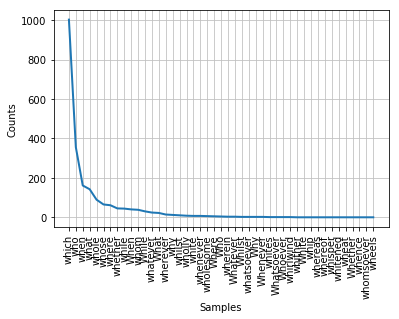

In [141]:
fd.plot()

20.

In [142]:
url = 'https://en.wikipedia.org/wiki/Basketball'

raw = urllib2.urlopen(url).read().decode('utf8')


The next step is important: tokenize the raw material from online

In [143]:
tokens = word_tokenize(raw)
tokens

[u'<',
 u'!',
 u'DOCTYPE',
 u'html',
 u'>',
 u'<',
 u'html',
 u'class=',
 u"''",
 u'client-nojs',
 u"''",
 u'lang=',
 u"''",
 u'en',
 u"''",
 u'dir=',
 u"''",
 u'ltr',
 u"''",
 u'>',
 u'<',
 u'head',
 u'>',
 u'<',
 u'meta',
 u'charset=',
 u"''",
 u'UTF-8',
 u"''",
 u'/',
 u'>',
 u'<',
 u'title',
 u'>',
 u'Basketball',
 u'-',
 u'Wikipedia',
 u'<',
 u'/title',
 u'>',
 u'<',
 u'script',
 u'>',
 u'document.documentElement.className',
 u'=',
 u'document.documentElement.className.replace',
 u'(',
 u'/',
 u'(',
 u'^|\\s',
 u')',
 u'client-nojs',
 u'(',
 u'\\s|',
 u'$',
 u')',
 u'/',
 u',',
 u'``',
 u'$',
 u'1client-js',
 u'$',
 u'2',
 u"''",
 u')',
 u';',
 u'<',
 u'/script',
 u'>',
 u'<',
 u'script',
 u'>',
 u'(',
 u'window.RLQ=window.RLQ||',
 u'[',
 u']',
 u')',
 u'.push',
 u'(',
 u'function',
 u'(',
 u')',
 u'{',
 u'mw.config.set',
 u'(',
 u'{',
 u'``',
 u'wgCanonicalNamespace',
 u"''",
 u':',
 u"''",
 u"''",
 u',',
 u"''",
 u'wgCanonicalSpecialPageName',
 u"''",
 u':',
 u'false',
 u',',
 u

Or, use BeautifulSoup to get the text

In [144]:
from bs4 import BeautifulSoup

In [145]:
text = BeautifulSoup(raw).get_text()
text

u'\n\n\nBasketball - Wikipedia\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );\n(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Basketball","wgTitle":"Basketball","wgCurRevisionId":778122494,"wgRevisionId":778122494,"wgArticleId":3921,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from October 2016","Articles with permanently dead external links","Webarchive template wayback links","Articles with dead external links from June 2016","Wikipedia indefinitely semi-protected pages","Wikipedia indefinitely move-protected pages","Use mdy dates from June 2011","All articles with unsourced statements","Articles with unsourced statements from April 2017","Articles with l

In [146]:
tokens = word_tokenize(text)
tokens

[u'Basketball',
 u'-',
 u'Wikipedia',
 u'document.documentElement.className',
 u'=',
 u'document.documentElement.className.replace',
 u'(',
 u'/',
 u'(',
 u'^|\\s',
 u')',
 u'client-nojs',
 u'(',
 u'\\s|',
 u'$',
 u')',
 u'/',
 u',',
 u'``',
 u'$',
 u'1client-js',
 u'$',
 u'2',
 u"''",
 u')',
 u';',
 u'(',
 u'window.RLQ=window.RLQ||',
 u'[',
 u']',
 u')',
 u'.push',
 u'(',
 u'function',
 u'(',
 u')',
 u'{',
 u'mw.config.set',
 u'(',
 u'{',
 u'``',
 u'wgCanonicalNamespace',
 u"''",
 u':',
 u"''",
 u"''",
 u',',
 u"''",
 u'wgCanonicalSpecialPageName',
 u"''",
 u':',
 u'false',
 u',',
 u"''",
 u'wgNamespaceNumber',
 u"''",
 u':0',
 u',',
 u"''",
 u'wgPageName',
 u"''",
 u':',
 u"''",
 u'Basketball',
 u"''",
 u',',
 u"''",
 u'wgTitle',
 u"''",
 u':',
 u"''",
 u'Basketball',
 u"''",
 u',',
 u"''",
 u'wgCurRevisionId',
 u"''",
 u':778122494',
 u',',
 u"''",
 u'wgRevisionId',
 u"''",
 u':778122494',
 u',',
 u"''",
 u'wgArticleId',
 u"''",
 u':3921',
 u',',
 u"''",
 u'wgIsArticle',
 u"''",
 u'

21.

In [147]:
word_list_english = nltk.corpus.words.words('en')
word_list_english[:5]

[u'A', u'a', u'aa', u'aal', u'aalii']

!!! Use .isalpha() to filter words only

In [148]:
word_only_list_web = [word for word in tokens if word.isalpha()]
word_only_list_web

[u'Basketball',
 u'Wikipedia',
 u'function',
 u'wgCanonicalNamespace',
 u'wgCanonicalSpecialPageName',
 u'false',
 u'wgNamespaceNumber',
 u'wgPageName',
 u'Basketball',
 u'wgTitle',
 u'Basketball',
 u'wgCurRevisionId',
 u'wgRevisionId',
 u'wgArticleId',
 u'wgIsArticle',
 u'true',
 u'wgIsRedirect',
 u'false',
 u'wgAction',
 u'view',
 u'wgUserName',
 u'null',
 u'wgUserGroups',
 u'wgCategories',
 u'All',
 u'articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'Articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'from',
 u'October',
 u'Articles',
 u'with',
 u'permanently',
 u'dead',
 u'external',
 u'links',
 u'Webarchive',
 u'template',
 u'wayback',
 u'links',
 u'Articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'from',
 u'June',
 u'Wikipedia',
 u'indefinitely',
 u'pages',
 u'Wikipedia',
 u'indefinitely',
 u'pages',
 u'Use',
 u'mdy',
 u'dates',
 u'from',
 u'June',
 u'All',
 u'articles',
 u'with',
 u'unsourced',
 u'statements',
 u'Articles',
 u'with',
 u'unsourced',
 u'st

In [149]:
word_not_in_corpus = [word.lower() for word in word_only_list_web 
                      if word.lower() not in word_list_english]
word_not_in_corpus

[u'wikipedia',
 u'wgcanonicalnamespace',
 u'wgcanonicalspecialpagename',
 u'wgnamespacenumber',
 u'wgpagename',
 u'wgtitle',
 u'wgcurrevisionid',
 u'wgrevisionid',
 u'wgarticleid',
 u'wgisarticle',
 u'wgisredirect',
 u'wgaction',
 u'wgusername',
 u'wgusergroups',
 u'wgcategories',
 u'articles',
 u'articles',
 u'october',
 u'articles',
 u'webarchive',
 u'articles',
 u'wikipedia',
 u'pages',
 u'wikipedia',
 u'pages',
 u'mdy',
 u'dates',
 u'articles',
 u'unsourced',
 u'statements',
 u'articles',
 u'unsourced',
 u'statements',
 u'april',
 u'articles',
 u'articles',
 u'references',
 u'april',
 u'articles',
 u'references',
 u'articles',
 u'unsourced',
 u'statements',
 u'january',
 u'articles',
 u'july',
 u'articles',
 u'january',
 u'articles',
 u'references',
 u'november',
 u'articles',
 u'dmoz',
 u'wikipedia',
 u'articles',
 u'lccn',
 u'identifiers',
 u'wikipedia',
 u'articles',
 u'gnd',
 u'identifiers',
 u'articles',
 u'containing',
 u'introductions',
 u'canadian',
 u'inventions',
 u'origi

In [150]:
fd = nltk.FreqDist(word_not_in_corpus)
fd.most_common(20)

[(u'players', 66),
 (u'games', 59),
 (u'retrieved', 57),
 (u'women', 54),
 (u'rules', 53),
 (u'teams', 51),
 (u'nba', 50),
 (u'fiba', 46),
 (u'played', 44),
 (u'states', 26),
 (u'articles', 26),
 (u'july', 26),
 (u'american', 24),
 (u'feet', 24),
 (u'has', 23),
 (u'naismith', 23),
 (u'called', 23),
 (u'dribbling', 21),
 (u'leagues', 21),
 (u'archived', 20)]

Most words are in a slightly different form compared with corpus words. e.g. player vs. players, etc.

Sort the result. Sorting result in the nltk.FreqDist as follow:

In [151]:
fd_sorted = sorted(fd, key=fd.get, reverse=True)

19.

In [152]:
freq_list = []

with open('chap3_ex19.txt', 'r') as f:
    for line in f:
        freq_list.append(list([line.split(' ')[0], line.split(' ')[1]]))
        
freq_list

[['goose', '1\n'],
 ['tampa', '52\n'],
 ['astronaut', '109\n'],
 ['elephant', '8\n'],
 ['naruto', '827\n'],
 ['trombone', '3\n']]

22.

In [153]:
url = "http://news.bbc.co.uk/"

raw = urllib2.urlopen(url).read().decode('utf8')
text = BeautifulSoup(raw).get_text()
text

u'\n\n\n\nHome - BBC News\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    {"@context":"http:\\/\\/schema.org","@type":"WebPage","url":"http:\\/\\/www.bbc.co.uk\\/news","publisher":{"@type":"Organization","name":"BBC News","logo":{"@type":"ImageObject","url":"http:\\/\\/www.bbc.co.uk\\/news\\/special\\/2015\\/newsspec_10857\\/bbc_news_logo.png?cb=1"}},"description":"Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, business, science, technology and health news.","name":"Home - BBC News"}\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\nvar _sf_startpt=(new Date()).getTime()\n\n        (function() {\n            if (navigator.userAgent.match(/IEMobile\\/10\\.0/)) {\n                var msViewportStyle = document.createElement("style");\n                msViewportStyle.appendChild(\n                    document.createTextNode("@-ms-viewport{

Make sure tokenize text before do anything

In [154]:
tokens = word_tokenize(text)
tokens

[u'Home',
 u'-',
 u'BBC',
 u'News',
 u'{',
 u'``',
 u'@',
 u'context',
 u"''",
 u':',
 u"''",
 u'http',
 u':',
 u'\\/\\/schema.org',
 u"''",
 u',',
 u"''",
 u'@',
 u'type',
 u"''",
 u':',
 u"''",
 u'WebPage',
 u"''",
 u',',
 u"''",
 u'url',
 u"''",
 u':',
 u"''",
 u'http',
 u':',
 u'\\/\\/www.bbc.co.uk\\/news',
 u"''",
 u',',
 u"''",
 u'publisher',
 u"''",
 u':',
 u'{',
 u'``',
 u'@',
 u'type',
 u"''",
 u':',
 u"''",
 u'Organization',
 u"''",
 u',',
 u"''",
 u'name',
 u"''",
 u':',
 u"''",
 u'BBC',
 u'News',
 u"''",
 u',',
 u"''",
 u'logo',
 u"''",
 u':',
 u'{',
 u'``',
 u'@',
 u'type',
 u"''",
 u':',
 u"''",
 u'ImageObject',
 u"''",
 u',',
 u"''",
 u'url',
 u"''",
 u':',
 u"''",
 u'http',
 u':',
 u'\\/\\/www.bbc.co.uk\\/news\\/special\\/2015\\/newsspec_10857\\/bbc_news_logo.png',
 u'?',
 u'cb=1',
 u"''",
 u'}',
 u'}',
 u',',
 u"''",
 u'description',
 u"''",
 u':',
 u"''",
 u'Visit',
 u'BBC',
 u'News',
 u'for',
 u'up-to-the-minute',
 u'news',
 u',',
 u'breaking',
 u'news',
 u',',
 u'vi

In [155]:
text_only = [word for word in text if word.isalpha()]
text_only

[u'H',
 u'o',
 u'm',
 u'e',
 u'B',
 u'B',
 u'C',
 u'N',
 u'e',
 u'w',
 u's',
 u'c',
 u'o',
 u'n',
 u't',
 u'e',
 u'x',
 u't',
 u'h',
 u't',
 u't',
 u'p',
 u's',
 u'c',
 u'h',
 u'e',
 u'm',
 u'a',
 u'o',
 u'r',
 u'g',
 u't',
 u'y',
 u'p',
 u'e',
 u'W',
 u'e',
 u'b',
 u'P',
 u'a',
 u'g',
 u'e',
 u'u',
 u'r',
 u'l',
 u'h',
 u't',
 u't',
 u'p',
 u'w',
 u'w',
 u'w',
 u'b',
 u'b',
 u'c',
 u'c',
 u'o',
 u'u',
 u'k',
 u'n',
 u'e',
 u'w',
 u's',
 u'p',
 u'u',
 u'b',
 u'l',
 u'i',
 u's',
 u'h',
 u'e',
 u'r',
 u't',
 u'y',
 u'p',
 u'e',
 u'O',
 u'r',
 u'g',
 u'a',
 u'n',
 u'i',
 u'z',
 u'a',
 u't',
 u'i',
 u'o',
 u'n',
 u'n',
 u'a',
 u'm',
 u'e',
 u'B',
 u'B',
 u'C',
 u'N',
 u'e',
 u'w',
 u's',
 u'l',
 u'o',
 u'g',
 u'o',
 u't',
 u'y',
 u'p',
 u'e',
 u'I',
 u'm',
 u'a',
 u'g',
 u'e',
 u'O',
 u'b',
 u'j',
 u'e',
 u'c',
 u't',
 u'u',
 u'r',
 u'l',
 u'h',
 u't',
 u't',
 u'p',
 u'w',
 u'w',
 u'w',
 u'b',
 u'b',
 u'c',
 u'c',
 u'o',
 u'u',
 u'k',
 u'n',
 u'e',
 u'w',
 u's',
 u's',
 u'p',
 u'e',
 u'c',

In [156]:
letters_only = [letter for letter in tokens if letter.isalpha()]
letters_only

[u'Home',
 u'BBC',
 u'News',
 u'context',
 u'http',
 u'type',
 u'WebPage',
 u'url',
 u'http',
 u'publisher',
 u'type',
 u'Organization',
 u'name',
 u'BBC',
 u'News',
 u'logo',
 u'type',
 u'ImageObject',
 u'url',
 u'http',
 u'description',
 u'Visit',
 u'BBC',
 u'News',
 u'for',
 u'news',
 u'breaking',
 u'news',
 u'video',
 u'audio',
 u'and',
 u'feature',
 u'stories',
 u'BBC',
 u'News',
 u'provides',
 u'trusted',
 u'World',
 u'and',
 u'UK',
 u'news',
 u'as',
 u'well',
 u'as',
 u'local',
 u'and',
 u'regional',
 u'perspectives',
 u'Also',
 u'entertainment',
 u'business',
 u'science',
 u'technology',
 u'and',
 u'health',
 u'news',
 u'name',
 u'Home',
 u'BBC',
 u'News',
 u'var',
 u'new',
 u'Date',
 u'function',
 u'if',
 u'var',
 u'msViewportStyle',
 u'style',
 u'width',
 u'auto',
 u'important',
 u'head',
 u'msViewportStyle',
 u'true',
 u'geo',
 u'true',
 u'bbcRequireMap',
 u'http',
 u'http',
 u'http',
 u'http',
 u'http',
 u'http',
 u'http',
 u'http',
 u'cssp',
 u'http',
 u'http',
 u'http',
 

23.

#### The key to use regular expression for splitting is to put square brackets and use "|" to separate the delimiters/ words that you want to use to split the sentence.

In [157]:
sent = '''pleae ! this * saa * sdasd! sdasd ! sd shi ^ sdisa, not a 
& not * not not() use it !$* sdsa'''
re.split('[!|*|not]',sent)

['pleae ',
 ' ',
 'his ',
 ' saa ',
 ' sdasd',
 ' sdasd ',
 ' sd shi ^ sdisa, ',
 '',
 '',
 ' a \n& ',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '() use i',
 ' ',
 '$',
 ' sdsa']

25.

Let's first try to find the first vowel in a string

In [158]:
vowels = ['a','e','i','o','u']

def find_position(word):
    for letter in string:
        if letter in vowels:
            position = string.index(letter)
    return position
     

Now re-construct the word

In [159]:
string='whomwhatever'
re.search('[aeiou]',string)

In [160]:
string='whomwhatever'
new_string = string[find_position(string):]+string[:find_position(string)]
new_string

'everwhomwhat'

27.

In [164]:
random.choice('aeiou')

'u'

To do something N times, use the itertools. The details are in my personal Github page:
https://github.com/thatMeow/My_Python_Skills_Collections/blob/master/Miscellaneous/Iterations/do_something_n_times.py

In [179]:
import itertools

string = 'aehh'

list_=[]

for _ in itertools.repeat(None, 500):
    list_.append(random.choice(string))
    
    
result = ''.join(list_)
result

'eaeaaahhhahhehheaahaheehehehhehahahheeehehaaaeeahhhhaeehahaahhaeheeahhhahheahhaaeheeaehhheaaehaehhhehhhehhhhhhahahhhhahhheaeaahheehaeaahahhehhhheehaahheehhhaehhhhhehahaahahahhhahheeaaheaheeehhhhheaeehahhhaehhahhehhahheheheahehhahhahhhheeheheahahheehhehahheaaeehheeehhaheaeahhhhaeaehhhheehhhhhhaeeeaehhahhhaaaheeeehhhaeahaeehahhhehhhaheehhhhhaahhhehhhaaehhhahheheeaahaaehaehheahhahheeheaeehhehehaheahheeeeehhaaahheahhaeheeahehhehehhhehahehhhhhhhehhheaheeahahhheaheaahahhahaehehhhhhehhhaeheahahhhaaaahh'

In [183]:
for letter in 'aeh':
    print "Number of letter "+ letter + " is: " + str(result.count(letter))

Number of letter a is: 117
Number of letter e is: 131
Number of letter h is: 252


29.

Let's get the brown corpus in nltk first:

In [186]:
from nltk.corpus import brown

My personal Github page of nltk book, chapter 2, contains the syntax to import nltk corpus and check files, get words, etc.:
https://github.com/thatMeow/Natural-Language-Processing/blob/master/NLTK_Book/2%20-%20Accessing%20Text%20Corpora%20and%20Lexical%20Resources.ipynb

In [187]:
brown.fileids()

[u'ca01',
 u'ca02',
 u'ca03',
 u'ca04',
 u'ca05',
 u'ca06',
 u'ca07',
 u'ca08',
 u'ca09',
 u'ca10',
 u'ca11',
 u'ca12',
 u'ca13',
 u'ca14',
 u'ca15',
 u'ca16',
 u'ca17',
 u'ca18',
 u'ca19',
 u'ca20',
 u'ca21',
 u'ca22',
 u'ca23',
 u'ca24',
 u'ca25',
 u'ca26',
 u'ca27',
 u'ca28',
 u'ca29',
 u'ca30',
 u'ca31',
 u'ca32',
 u'ca33',
 u'ca34',
 u'ca35',
 u'ca36',
 u'ca37',
 u'ca38',
 u'ca39',
 u'ca40',
 u'ca41',
 u'ca42',
 u'ca43',
 u'ca44',
 u'cb01',
 u'cb02',
 u'cb03',
 u'cb04',
 u'cb05',
 u'cb06',
 u'cb07',
 u'cb08',
 u'cb09',
 u'cb10',
 u'cb11',
 u'cb12',
 u'cb13',
 u'cb14',
 u'cb15',
 u'cb16',
 u'cb17',
 u'cb18',
 u'cb19',
 u'cb20',
 u'cb21',
 u'cb22',
 u'cb23',
 u'cb24',
 u'cb25',
 u'cb26',
 u'cb27',
 u'cc01',
 u'cc02',
 u'cc03',
 u'cc04',
 u'cc05',
 u'cc06',
 u'cc07',
 u'cc08',
 u'cc09',
 u'cc10',
 u'cc11',
 u'cc12',
 u'cc13',
 u'cc14',
 u'cc15',
 u'cc16',
 u'cc17',
 u'cd01',
 u'cd02',
 u'cd03',
 u'cd04',
 u'cd05',
 u'cd06',
 u'cd07',
 u'cd08',
 u'cd09',
 u'cd10',
 u'cd11',
 u'cd12',


In [188]:
for file_ in brown.fileids():
    print file_, len(brown.words(file_))

ca01 2242
ca02 2277
ca03 2275
ca04 2217
ca05 2244
ca06 2263
ca07 2270
ca08 2187
ca09 2234
ca10 2282
ca11 2259
ca12 2338
ca13 2241
ca14 2329
ca15 2314
ca16 2374
ca17 2293
ca18 2314
ca19 2260
ca20 2317
ca21 2245
ca22 2309
ca23 2327
ca24 2252
ca25 2327
ca26 2278
ca27 2288
ca28 2220
ca29 2349
ca30 2274
ca31 2311
ca32 2323
ca33 2284
ca34 2235
ca35 2217
ca36 2229
ca37 2324
ca38 2221
ca39 2452
ca40 2340
ca41 2313
ca42 2338
ca43 2291
ca44 2277
cb01 2200
cb02 2234
cb03 2244
cb04 2230
cb05 2241
cb06 2231
cb07 2239
cb08 2395
cb09 2312
cb10 2298
cb11 2293
cb12 2296
cb13 2267
cb14 2264
cb15 2311
cb16 2260
cb17 2288
cb18 2194
cb19 2287
cb20 2299
cb21 2278
cb22 2294
cb23 2357
cb24 2346
cb25 2368
cb26 2316
cb27 2262
cc01 2415
cc02 2320
cc03 2356
cc04 2342
cc05 2398
cc06 2433
cc07 2421
cc08 2351
cc09 2345
cc10 2461
cc11 2480
cc12 2342
cc13 2282
cc14 2574
cc15 2503
cc16 2311
cc17 2370
cd01 2213
cd02 2334
cd03 2332
cd04 2318
cd05 2410
cd06 2317
cd07 2359
cd08 2332
cd09 2314
cd10 2238
cd11 2304
cd12 2307


Let's check the first file and see the words in it.

In [189]:
sample_words = brown.words('ca01')
sample_words

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

### Count number of chapters, sentences, and words in the last 3 files

In [191]:
for file_ in brown.fileids()[-3:]:
    print "File name: ", file_
    print "Number of raw content: ", len(brown.raw(file_))
    print "Number of sentences: ", len(brown.sents(file_))
    print "Number of words: ", len(brown.words(file_))
    print "Number of unique words: ", len(set(brown.words(file_)))
    print "\n"

File name:  cr07
Number of raw content:  19973
Number of sentences:  184
Number of words:  2456
Number of unique words:  724


File name:  cr08
Number of raw content:  20608
Number of sentences:  70
Number of words:  2371
Number of unique words:  1067


File name:  cr09
Number of raw content:  19645
Number of sentences:  99
Number of words:  2332
Number of unique words:  1072




In [192]:
for file_ in brown.fileids()[-3:]:
    print "File name: ", file_
    print "Number of characters per word ", len(brown.raw(file_))/len(brown.words(file_))
    print "Number of words per sentence: ", len(brown.words(file_))/len(brown.sents(file_))
    print "\n"

File name:  cr07
Number of characters per word  8
Number of words per sentence:  13


File name:  cr08
Number of characters per word  8
Number of words per sentence:  33


File name:  cr09
Number of characters per word  8
Number of words per sentence:  23


